In [185]:
import numpy as np
import pandas as pd
 
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam

# Progress Bar
from tqdm import tqdm

In [150]:
df = pd.read_csv(r"D:\Data_Science_Project\Clinical\Data_Sets\PATIENTS.csv")

In [151]:
df.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [152]:
df.shape

(100, 8)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [154]:
df.columns

Index(['row_id', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn',
       'expire_flag'],
      dtype='object')

In [155]:
df.isnull().sum()

row_id          0
subject_id      0
gender          0
dob             0
dod             0
dod_hosp       30
dod_ssn        23
expire_flag     0
dtype: int64

In [156]:
# Convert to datetime
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['dod'] = pd.to_datetime(df['dod'], errors='coerce')

# MIMIC age workaround
df['age'] = 2100 - df['dob'].dt.year

# Remove unrealistic ages
df = df[(df['age'] > 0) & (df['age'] < 120)]

df[['dob', 'age']].head()


,dob,age
0,2094-03-05,6
1,2090-06-05,10
2,2038-09-03,62
3,2075-09-21,25
7,2061-04-10,39


In [157]:
df.describe(include='all')

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
count,71.000000,71.000000,71,71,71,50,56,71.0,71.000000
unique,NaN,NaN,2,NaN,NaN,50,56,NaN,NaN
top,NaN,NaN,F,NaN,NaN,2165-08-12 00:00:00,2165-08-12 00:00:00,NaN,NaN
freq,NaN,NaN,37,NaN,NaN,1,1,NaN,NaN
mean,20902.774648,26797.577465,NaN,2066-03-13 03:22:49.014084608,2140-07-02 03:22:49.014084608,NaN,NaN,1.0,34.267606
min,9467.000000,10006.000000,NaN,2016-12-05 00:00:00,2105-02-16 00:00:00,NaN,NaN,1.0,1.000000
25%,9532.000000,10075.000000,NaN,2051-03-23 12:00:00,2124-09-18 00:00:00,NaN,NaN,1.0,18.500000
50%,30839.000000,40177.000000,NaN,2063-07-05 00:00:00,2138-11-18 00:00:00,NaN,NaN,1.0,37.000000
75%,31391.500000,42278.000000,NaN,2082-03-27 12:00:00,2155-08-25 12:00:00,NaN,NaN,1.0,49.000000
max,31867.000000,44212.000000,NaN,2099-09-02 00:00:00,2186-07-07 00:00:00,NaN,NaN,1.0,84.000000


In [158]:
df_clena = df.drop(columns=['dod_hosp', 'dod_ssn'])

In [159]:
df_clena.isnull().sum()

row_id         0
subject_id     0
gender         0
dob            0
dod            0
expire_flag    0
age            0
dtype: int64

In [160]:
df_clean = df.dropna()


In [161]:
df['dod_hosp'] =  pd.to_datetime(df['dod_hosp'])
df['dod_ssn'] = pd.to_datetime(df['dod_ssn'])

In [162]:
df['dod_hosp'] = df['dod_hosp'].fillna(pd.Timestamp('1900-01-01'))
df['dod_ssn'] = df['dod_ssn'].fillna(pd.Timestamp('1900-01-01'))

In [163]:
df = df.drop(columns=['dod_hosp', 'dod_ssn'])

df.isnull().sum()

row_id         0
subject_id     0
gender         0
dob            0
dod            0
expire_flag    0
age            0
dtype: int64

In [164]:
df.head()

,row_id,subject_id,gender,dob,dod,expire_flag,age
0,9467,10006,F,2094-03-05,2165-08-12,1,6
1,9472,10011,F,2090-06-05,2126-08-28,1,10
2,9474,10013,F,2038-09-03,2125-10-07,1,62
3,9478,10017,F,2075-09-21,2152-09-12,1,25
7,9489,10029,M,2061-04-10,2140-09-21,1,39


In [165]:
selected_df = df[['age', 'gender', 'expire_flag']]
selected_df.head()

,age,gender,expire_flag
0,6,F,1
1,10,F,1
2,62,F,1
3,25,F,1
7,39,M,1


In [166]:
df.isnull().sum()

row_id         0
subject_id     0
gender         0
dob            0
dod            0
expire_flag    0
age            0
dtype: int64

In [167]:
# Make a copy to avoid view issues
selected_df = df[['age','gender','expire_flag']].copy()

# Encode gender
selected_df['gender'] = selected_df['gender'].map({'M': 0, 'F': 1})

# Confirm
print(selected_df['gender'].unique())


[1 0]


d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


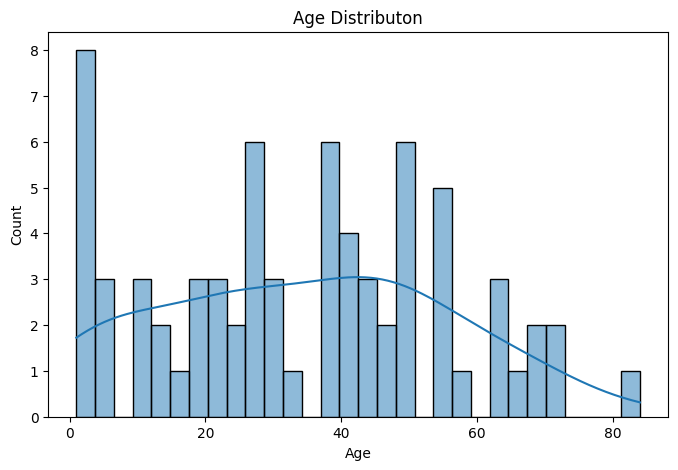

In [168]:

plt.figure(figsize=(8,5))
sns.histplot(selected_df['age'], bins=30, kde=True)
plt.title("Age Distributon")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


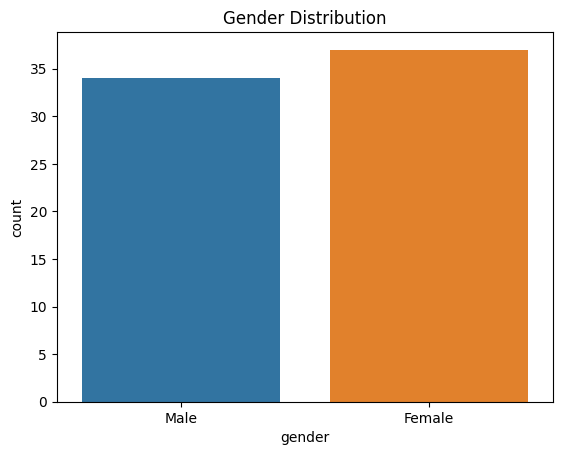

In [169]:
sns.countplot(x='gender', data=selected_df)
plt.xticks([0,1], ['Male', 'Female'])
plt.title("Gender Distribution")
plt.show()

d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


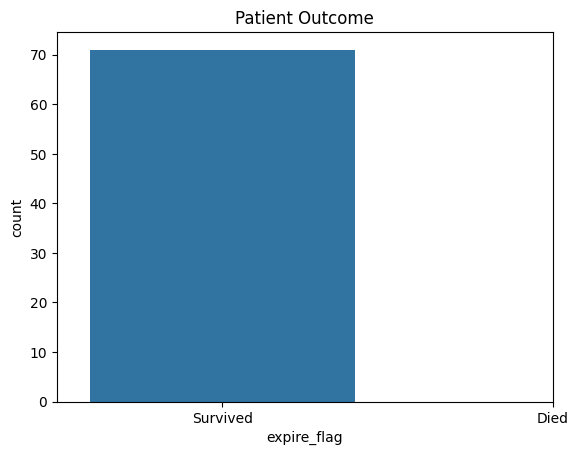

In [170]:
sns.countplot(x='expire_flag', data=selected_df)
plt.xticks([0, 1], ['Survived', 'Died'])
plt.title("Patient Outcome")
plt.show()

d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Data_Science_Project\Clinical\env\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to

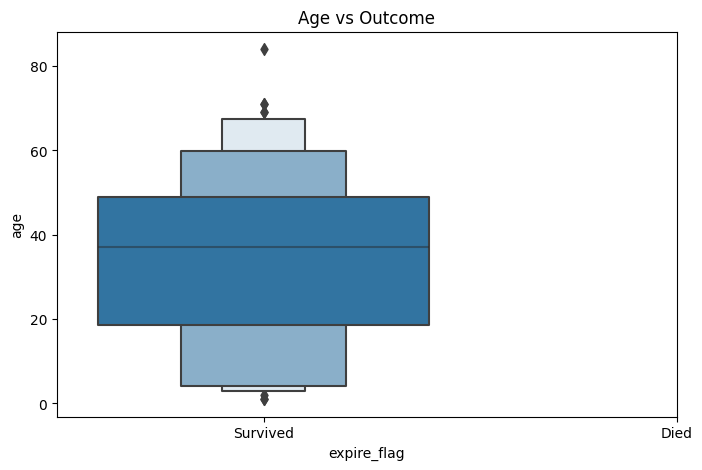

In [171]:
plt.figure(figsize=(8,5))
sns.boxenplot(x='expire_flag', y='age', data=selected_df)
plt.xticks([0,1], ['Survived', 'Died'])
plt.title("Age vs Outcome")
plt.show()

In [172]:
# Convert gender to numeric
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

In [173]:
df[['gender']].head()
df['gender'].unique()

array([1, 0], dtype=int64)

In [174]:
X = selected_df[['age', 'gender']]
y = selected_df['expire_flag']

In [179]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check first 5 rows
X_scaled[:5]

array([[-1.3463578 ,  0.95860259],
       [-1.1558418 ,  0.95860259],
       [ 1.32086622,  0.95860259],
       [-0.44140679,  0.95860259],
       [ 0.22539921, -1.04318517]])

In [180]:
rewards = np.where(y == 0, 1, -1)
rewards[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [181]:
np.random.seed(42)
actions = np.random.choice([0, 1], size=len(X_scaled))

In [182]:
# Simple next_state assumption
next_states = X_scaled.copy()

In [183]:
states = X_scaled
actions = actions
rewards = rewards
next_states = next_states

print("States shape:", states.shape)
print("Actions shape:", actions.shape)
print("Rewards shape:", rewards.shape)
print("Next states shape:", next_states.shape)


States shape: (71, 2)
Actions shape: (71,)
Rewards shape: (71,)
Next states shape: (71, 2)


In [184]:
states_tf = tf.convert_to_tensor(states, dtype=tf.float32)
actions_tf = tf.convert_to_tensor(actions, dtype=tf.int32)
rewards_tf = tf.convert_to_tensor(rewards, dtype=tf.float32)
next_states_tf = tf.convert_to_tensor(next_states, dtype=tf.float32)

In [186]:
state_size = X_scaled.shape[1]  # 2 (age, gender)
action_size = 2  

def build_q_network(state_size, action_size):
    model = Sequential()
    model.add(InputLayer(input_shape=(state_size,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(action_size, activation='linear'))  # Q-values for each action
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

q_model = build_q_network(state_size, action_size)
q_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1218 (4.76 KB)
Trainable params: 1218 (4.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
# states, actions, rewards, next_states
states_tf = X_scaled
actions_tf = actions
rewards_tf = rewards
next_states_tf = next_states

In [188]:
gamma = 0.99  # discount factor
epochs = 50   # training epochs
batch_size = 32

for epoch in range(epochs):
    # Shuffle data
    indices = np.arange(len(states_tf))
    np.random.shuffle(indices)
    
    states_shuffled = states_tf[indices]
    actions_shuffled = actions_tf[indices]
    rewards_shuffled = rewards_tf[indices]
    next_states_shuffled = next_states_tf[indices]
    
    # Mini-batch training
    for i in range(0, len(states_tf), batch_size):
        s_batch = states_shuffled[i:i+batch_size]
        a_batch = actions_shuffled[i:i+batch_size]
        r_batch = rewards_shuffled[i:i+batch_size]
        s_next_batch = next_states_shuffled[i:i+batch_size]
        
        # Predict Q-values for current states
        q_values = q_model.predict(s_batch, verbose=0)
        
        # Predict Q-values for next states
        q_next = q_model.predict(s_next_batch, verbose=0)
        
        # Q-Learning target
        for j in range(len(s_batch)):
            q_values[j, a_batch[j]] = r_batch[j] + gamma * np.max(q_next[j])
        
        # Train the model on batch
        q_model.train_on_batch(s_batch, q_values)
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} completed")



Epoch 10/50 completed
Epoch 20/50 completed
Epoch 30/50 completed
Epoch 40/50 completed
Epoch 50/50 completed


In [189]:
# For a given state, choose best action
def get_action(state):
    q_values = q_model.predict(state.reshape(1,-1), verbose=0)
    return np.argmax(q_values)

# Test on first 5 states
for i in range(5):
    print("State:", X_scaled[i], "Best Action:", get_action(X_scaled[i]))


State: [-1.3463578   0.95860259] Best Action: 0
State: [-1.1558418   0.95860259] Best Action: 0
State: [1.32086622 0.95860259] Best Action: 1
State: [-0.44140679  0.95860259] Best Action: 0
State: [ 0.22539921 -1.04318517] Best Action: 1


In [190]:
# Predict best action for each patient (policy)
y_pred_actions = np.array([np.argmax(q_model.predict(s.reshape(1,-1), verbose=0)) for s in X_scaled])

print("Sample predicted actions:", y_pred_actions[:10])


Sample predicted actions: [0 0 1 0 1 1 1 1 1 1]


In [191]:
# Simplified mapping (for evaluation only)
y_pred = np.where(y_pred_actions==0, 1, 0)   # 1 = survived, 0 = died
y_true = np.where(y==0, 1, 0)               # actual survived = 1, died = 0

In [192]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print("Accuracy Score:", acc)


Accuracy Score: 0.5070422535211268


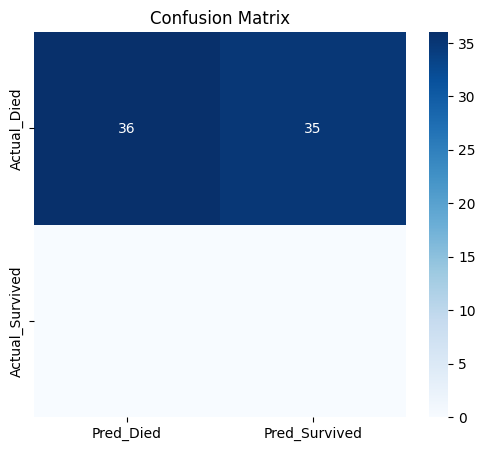

In [193]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred_Died','Pred_Survived'], yticklabels=['Actual_Died','Actual_Survived'])
plt.title("Confusion Matrix")
plt.show()


d:\Data_Science_Project\Clinical\env\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


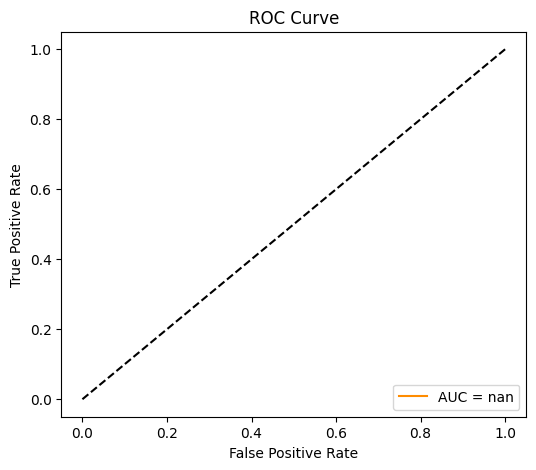

In [194]:
from sklearn.metrics import roc_curve, auc

# For ROC, use Q-values as probability-like scores
q_values = np.array([q_model.predict(s.reshape(1,-1), verbose=0)[0] for s in X_scaled])
# Take max Q-value as confidence for survival
y_score = q_values[:,0]  # action 0 mapped to survive for simplicity

fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()


In [195]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc_list = []

for train_index, test_index in kf.split(X_scaled):
    X_test, y_test = X_scaled[test_index], y_true[test_index]
    
    y_pred_fold = np.array([np.argmax(q_model.predict(s.reshape(1,-1), verbose=0)) for s in X_test])
    y_pred_fold = np.where(y_pred_fold==0, 1, 0)
    
    acc_list.append(accuracy_score(y_test, y_pred_fold))

print("5-Fold Cross Validation Accuracy:", np.mean(acc_list))


5-Fold Cross Validation Accuracy: 0.5038095238095238


In [196]:
import os

# Project main folder
project_dir = r"D:\Data_Science_Project\Clinical\RL_Model"

# Subfolders
model_dir = os.path.join(project_dir, "Saved_Models")
os.makedirs(model_dir, exist_ok=True)

print("Folder structure created at:", model_dir)


Folder structure created at: D:\Data_Science_Project\Clinical\RL_Model\Saved_Models


In [197]:
# Model save path
model_path = os.path.join(model_dir, "q_network_model.h5")

# Save the model
q_model.save(model_path)
print("Q-network model saved at:", model_path)


d:\Data_Science_Project\Clinical\env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Q-network model saved at: D:\Data_Science_Project\Clinical\RL_Model\Saved_Models\q_network_model.h5


In [198]:
import joblib

scaler_path = os.path.join(model_dir, "scaler.save")
joblib.dump(scaler, scaler_path)
print("Scaler saved at:", scaler_path)


Scaler saved at: D:\Data_Science_Project\Clinical\RL_Model\Saved_Models\scaler.save


In [199]:
import json

meta = {
    "action_mapping": {"0": "No aggressive treatment", "1": "Aggressive treatment"},
    "feature_columns": ["age", "gender"],
    "reward_mapping": {"1": "Survived", "-1": "Died"}
}

meta_path = os.path.join(model_dir, "metadata.json")
with open(meta_path, "w") as f:
    json.dump(meta, f, indent=4)
    
print("Metadata saved at:", meta_path)


Metadata saved at: D:\Data_Science_Project\Clinical\RL_Model\Saved_Models\metadata.json


In [200]:
from tensorflow.keras.models import load_model

# Load model
q_model_loaded = load_model(model_path)

# Load scaler
scaler_loaded = joblib.load(scaler_path)
